병질환 이외의 사고 중 익사의 비율이 어떻게 되는지

In [1]:
import pandas as pd

In [60]:
#(1)전체 사고 중 익사의 비율은 어떻게 되는가

data1 = pd.read_csv('./병질환이외의 사망자수.csv', encoding='cp949')
data1.head(5)

,사망원인별(104항목),성별,연령(5세)별,2015,2015.1,2016,2016.1,2017,2017.1,2018,2018.1
0,사망원인별(104항목),성별,연령(5세)별,사망자수 (명),사망률 (십만명당),사망자수 (명),사망률 (십만명당),사망자수 (명),사망률 (십만명당),사망자수 (명),사망률 (십만명당)
1,운수사고 (V01-V99),계,1 - 4세,35,1.9,28,1.5,27,1.5,15,0.9
2,운수사고 (V01-V99),계,5 - 9세,35,1.5,33,1.4,29,1.2,23,1.0
3,운수사고 (V01-V99),계,10 - 14세,31,1.2,19,0.8,17,0.7,15,0.6
4,운수사고 (V01-V99),계,15 - 19세,163,5.0,146,4.6,129,4.3,103,3.6


In [61]:
# 첫변째 행 제거
data1 = data1.drop([0])

print(data1['연령(5세)별'])
#연령(5세)별 열에서 1-4세 와 5-9세인 행만 남기고 나머지 행 제거
age_1_4 = data1[data1['연령(5세)별'] == '1 - 4세']
age_5_9 = data1[data1['연령(5세)별'] == '5 - 9세']


1       1 - 4세
2       5 - 9세
3     10 - 14세
4     15 - 19세
5     20 - 24세
        ...   
76    55 - 59세
77    60 - 64세
78    65 - 69세
79    70 - 74세
80    75 - 79세
Name: 연령(5세)별, Length: 80, dtype: object


In [62]:
# 1-4세와 5-9세의 사망자수를 합친다
age_accident = pd.concat([age_1_4, age_5_9])

In [63]:
age_accident

,사망원인별(104항목),성별,연령(5세)별,2015,2015.1,2016,2016.1,2017,2017.1,2018,2018.1
1,운수사고 (V01-V99),계,1 - 4세,35,1.9,28,1.5,27,1.5,15,0.9
17,낙상(추락) (W00-W19),계,1 - 4세,12,0.6,8,0.4,14,0.8,18,1.1
33,불의의 익사 및 익수 (W65-W74),계,1 - 4세,10,0.5,8,0.4,11,0.6,7,0.4
49,"연기, 불 및 불꽃에 노출 (X00-X09)",계,1 - 4세,1,0.1,1,0.1,0,-,0,-
65,유독성 물질에 의한 불의의 중독 및 노출 (X40-X49),계,1 - 4세,0,-,0,-,1,0.1,1,0.1
2,운수사고 (V01-V99),계,5 - 9세,35,1.5,33,1.4,29,1.2,23,1.0
18,낙상(추락) (W00-W19),계,5 - 9세,5,0.2,5,0.2,6,0.3,5,0.2
34,불의의 익사 및 익수 (W65-W74),계,5 - 9세,8,0.3,8,0.3,7,0.3,5,0.2
50,"연기, 불 및 불꽃에 노출 (X00-X09)",계,5 - 9세,6,0.3,0,-,4,0.2,5,0.2
66,유독성 물질에 의한 불의의 중독 및 노출 (X40-X49),계,5 - 9세,0,-,1,0.0,0,-,2,0.1


In [64]:
#age_accident의 데이터 타입 확인
age_accident_1.dtypes

사망원인별(104항목)    object
성별              object
연령(5세)별         object
2015            object
2015.1          object
2016            object
2016.1          object
2017            object
2017.1          object
2018            object
2018.1          object
dtype: object

In [65]:
#데이터프레임에 '-'값이 있으면 0으로 변환
age_accident = age_accident.replace('-', 0)

In [66]:
#2015~2018열 데이터 타입을 int로 변경
age_accident['2015'] = age_accident['2015'].astype(float)
age_accident['2015.1'] = age_accident['2015.1'].astype(float)
age_accident['2016'] = age_accident['2016'].astype(float)
age_accident['2016.1'] = age_accident['2016.1'].astype(float)
age_accident['2017'] = age_accident['2017'].astype(float)
age_accident['2017.1'] = age_accident['2017.1'].astype(float)
age_accident['2018'] = age_accident['2018'].astype(float)
age_accident['2018.1'] = age_accident['2018.1'].astype(float)


In [85]:
#사망원인별(104항목)기준으로 사망자수와 사망률 sum
age_accident_1 = age_accident.groupby('사망원인별(104항목)').sum()

In [86]:
age_accident_1

,성별,연령(5세)별,2015,2015.1,2016,2016.1,2017,2017.1,2018,2018.1
사망원인별(104항목),,,,,,,,,,
낙상(추락) (W00-W19),계계,1 - 4세5 - 9세,17.0,0.8,13.0,0.6,20.0,1.1,23.0,1.3
불의의 익사 및 익수 (W65-W74),계계,1 - 4세5 - 9세,18.0,0.8,16.0,0.7,18.0,0.9,12.0,0.6
"연기, 불 및 불꽃에 노출 (X00-X09)",계계,1 - 4세5 - 9세,7.0,0.4,1.0,0.1,4.0,0.2,5.0,0.2
운수사고 (V01-V99),계계,1 - 4세5 - 9세,70.0,3.4,61.0,2.9,56.0,2.7,38.0,1.9
유독성 물질에 의한 불의의 중독 및 노출 (X40-X49),계계,1 - 4세5 - 9세,0.0,0.0,1.0,0.0,1.0,0.1,3.0,0.2


In [87]:
#여기서 2015, 2016, 2017, 2018열 삭제
age_accident_1 = age_accident_1.drop(['2015', '2016', '2017', '2018','성별','연령(5세)별'], axis=1)

In [88]:
age_accident_1

,2015.1,2016.1,2017.1,2018.1
사망원인별(104항목),,,,
낙상(추락) (W00-W19),0.8,0.6,1.1,1.3
불의의 익사 및 익수 (W65-W74),0.8,0.7,0.9,0.6
"연기, 불 및 불꽃에 노출 (X00-X09)",0.4,0.1,0.2,0.2
운수사고 (V01-V99),3.4,2.9,2.7,1.9
유독성 물질에 의한 불의의 중독 및 노출 (X40-X49),0.0,0.0,0.1,0.2


In [100]:
#인덱스가 운수사고 (V01-V99)인 행 제거
age_accident_1 = age_accident_1.drop(['운수사고 (V01-V99)'])

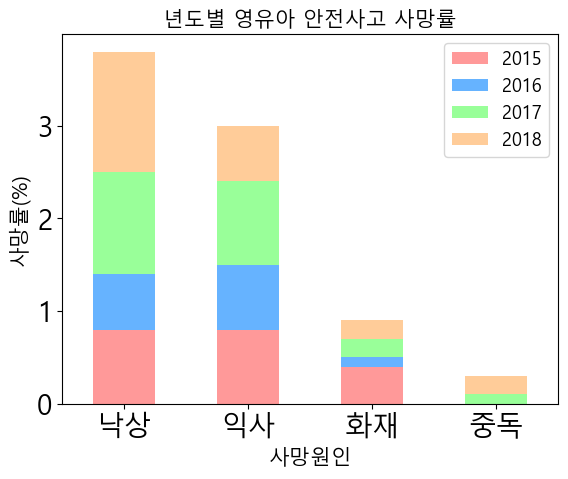

In [166]:
import plotly.express as px
import plotly.graph_objects as go

#한글 폰트 적용
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

# 누적 막대 그래프 그리기
ax = age_accident_1.plot(kind='bar', stacked=True,color =['#ff9999','#66b3ff','#99ff99','#ffcc99'])

# 범례 표시
ax.legend(loc='upper right', labels=['2015', '2016','2017','2018'], fontsize=13)


# 그래프 제목 설정
plt.title('년도별 영유아 안전사고 사망률', fontsize=15)

#x축 이름 변경
ax.set_xticklabels(['낙상', '익사','화재','중독'])

#x축 라벨
plt.xlabel('사망원인', fontsize=15)

plt.ylabel('사망률(%)', fontsize=15)


#x축 90도 회전
plt.xticks(rotation=360)
# 그래프 출력
plt.show()


Text(0, 0.5, '')

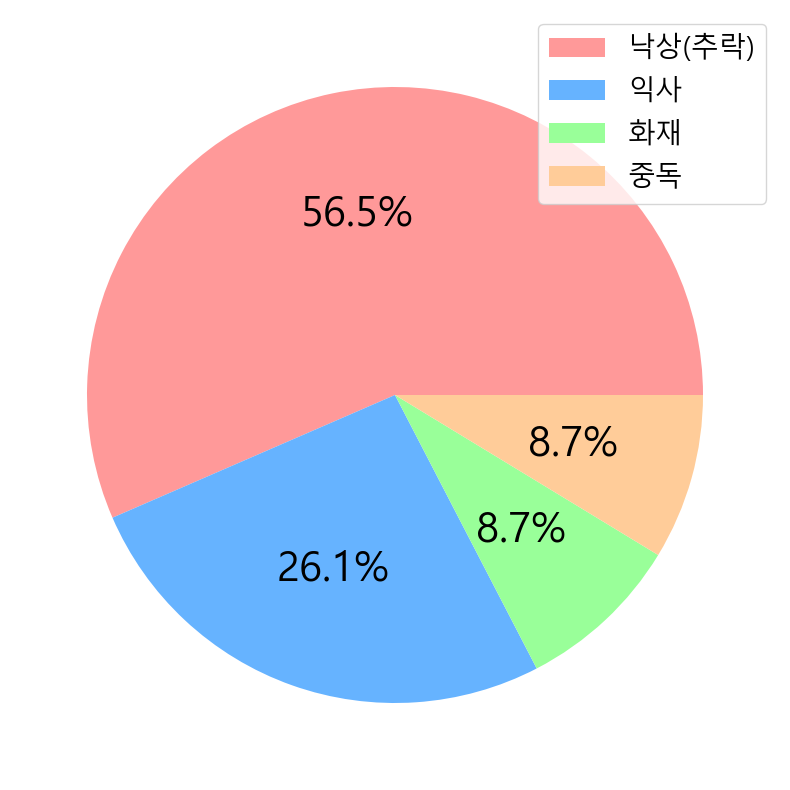

In [154]:
#열이 2018.1인 부분만 원그래프 생성
age_accident_2 = age_accident_1['2018.1']

#원그래프 생성
age_accident_2.plot(kind='pie', autopct='%1.1f%%', figsize=(10,10),textprops={'fontsize': 30}, labels = None, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

plt.legend(labels=['낙상(추락)', '익사','화재','중독'])


#라벨이름 바꾸기
plt.ylabel('')



월별 익사 사고 발생률

In [3]:
#데이터 불러오기
import pandas as pd
data_month = pd.read_csv('./익사_2015-2018 월별_사망자수.csv', encoding='cp949')
data_month.head(5)

,사망원인별(104항목),성별,2015.01,2015.02,2015.03,2015.04,2015.05,2015.06,2015.07,2015.08,...,2018.07,2018.08,2018.09,2018.10,2018.11,2018.12,2015,2016,2017,2018
0,불의의 익사 및 익수 (W65-W74),계,39,41,35,43,66,59,72,114,...,98,104,53,28,35,22,589,649,585,557
1,불의의 익사 및 익수 (W65-W74),남자,30,29,22,25,47,40,55,100,...,76,91,49,25,26,14,440,500,452,432
2,불의의 익사 및 익수 (W65-W74),여자,9,12,13,18,19,19,17,14,...,22,13,4,3,9,8,149,149,133,125


In [4]:
#성별 열에 '여자','남자'가 들어간 행 제거
data_month = data_month.drop([1,2])

In [5]:
#열이름이 '2015','2016','2017','2018'인 열 제거
data_month = data_month.drop(['2015','2016','2017','2018'], axis=1)

In [6]:
data_month

,사망원인별(104항목),성별,2015.01,2015.02,2015.03,2015.04,2015.05,2015.06,2015.07,2015.08,...,2018.03,2018.04,2018.05,2018.06,2018.07,2018.08,2018.09,2018.10,2018.11,2018.12
0,불의의 익사 및 익수 (W65-W74),계,39,41,35,43,66,59,72,114,...,16,34,53,57,98,104,53,28,35,22


In [7]:
#열 이름이 '2015.01', '2016.01', '2017.01', '2018.01'인 열 내용을 합산하여 "1월"이라는 새로운 열에 저장

for i in range(1,13):
    if i < 10 :
        data_month[str(i)+'월'] = data_month['2015.0'+str(i)] + data_month['2016.0'+str(i)] + data_month['2017.0'+str(i)] + data_month['2018.0'+str(i)]
    else:
        data_month[str(i)+'월'] = data_month['2015.'+str(i)] + data_month['2016.'+str(i)] + data_month['2017.'+str(i)] + data_month['2018.'+str(i)]

In [8]:
#1월~ 12월 열만 추출
data_month_new = data_month[['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월']]

In [9]:
data_month_new

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,137,137,119,161,220,237,335,463,181,142,121,127


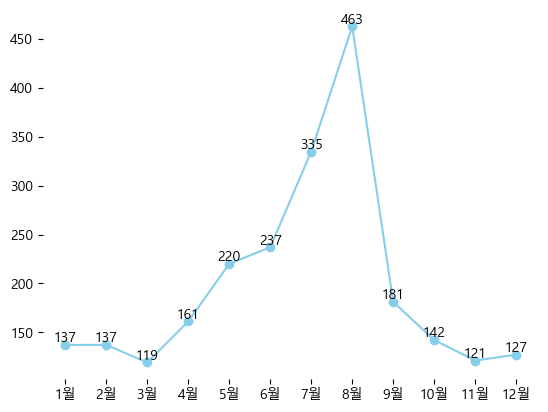

In [16]:
# Extract the column values
import matplotlib.pyplot as plt

#한글폰트 적용
plt.rc('font', family='Malgun Gothic')

months = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']
values = [137, 137, 119, 161, 220, 237, 335, 463, 181, 142, 121, 127]

# Plot the line graph
plt.plot(months, values, marker='o', linestyle='-', color='skyblue')

for i in range(len(months)):
    plt.text(months[i], values[i], str(values[i]), ha='center', va='bottom', fontsize=10)

# Customize the plot
# plt.title('Monthly Values')
# plt.xlabel('Month')
# plt.ylabel('Value')

#x축 폰트 크기
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#그래프 테두리 없에기
plt.box(False)

# Display the plot
plt.show()

연령별 익수자 시각화

In [140]:
#데이터 불러오기
data_sex = pd.read_csv('./익사_2015-2018 월별_사망자수.csv', encoding='cp949')
data_sex.head(5)

,사망원인별(104항목),성별,2015.01,2015.02,2015.03,2015.04,2015.05,2015.06,2015.07,2015.08,...,2018.07,2018.08,2018.09,2018.10,2018.11,2018.12,2015,2016,2017,2018
0,불의의 익사 및 익수 (W65-W74),계,39,41,35,43,66,59,72,114,...,98,104,53,28,35,22,589,649,585,557
1,불의의 익사 및 익수 (W65-W74),남자,30,29,22,25,47,40,55,100,...,76,91,49,25,26,14,440,500,452,432
2,불의의 익사 및 익수 (W65-W74),여자,9,12,13,18,19,19,17,14,...,22,13,4,3,9,8,149,149,133,125


In [141]:
#첫번째 행 삭제
data_sex = data_sex.drop([0])

In [180]:
#열이름이 '2015','2016','2017','2018'인 열만 가져오기
data_sex_a = data_sex[['2015','2016','2017','2018']]
data_sex_a

,2015,2016,2017,2018
1,440,500,452,432
2,149,149,133,125


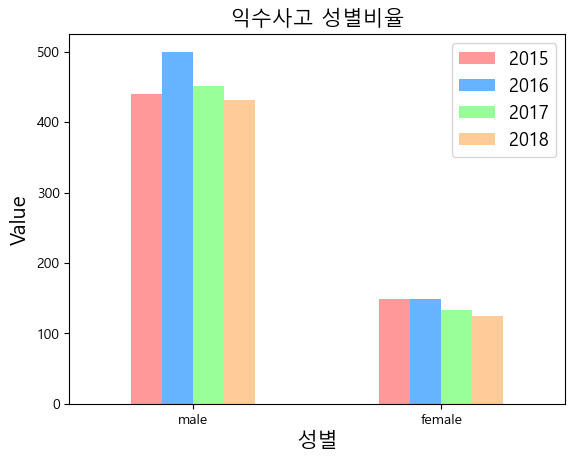

In [190]:
# Plot the bar graph
t = data_sex_a.plot(kind='bar',color = ['#ff9999','#66b3ff','#99ff99','#ffcc99'])

# Customize the plot
plt.title('익수사고 성별비율', fontsize=15)
plt.xlabel('성별',fontsize=15)
plt.ylabel('Value',fontsize=15)
plt.legend(['2015', '2016','2017','2018'])

# 범례 표시
t.legend(loc='upper right', labels=['2015', '2016','2017','2018'], fontsize=13)



#x축 이름 변경
t.set_xticklabels(['male', 'female'])

#x축 폰트 크기
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#90도 회전
plt.xticks(rotation=360)

# Display the plot
plt.show()

 해수욕장, 수영장 이용률

In [192]:
#데이터 불러오기
data4 = pd.read_csv('./레저시설_이용_횟수.csv', encoding='cp949')
data4.head(5)

,Unnamed: 0,해수욕장 (%),수영장(워터파크) (%)
0,2013,34.7,25.4
1,2015,30.7,25.5
2,2017,33.5,27.1
3,2019,33.8,28.4


In [193]:
#첫번째 열을 인덱스로 지정
data4 = data4.set_index(data4.columns[0])

In [195]:
#인덱스 이름을 새로 지정
data4.index.name = 'year'

(array([24., 26., 28., 30., 32., 34., 36.]),
 [Text(0, 24.0, '24'),
  Text(0, 26.0, '26'),
  Text(0, 28.0, '28'),
  Text(0, 30.0, '30'),
  Text(0, 32.0, '32'),
  Text(0, 34.0, '34'),
  Text(0, 36.0, '36')])

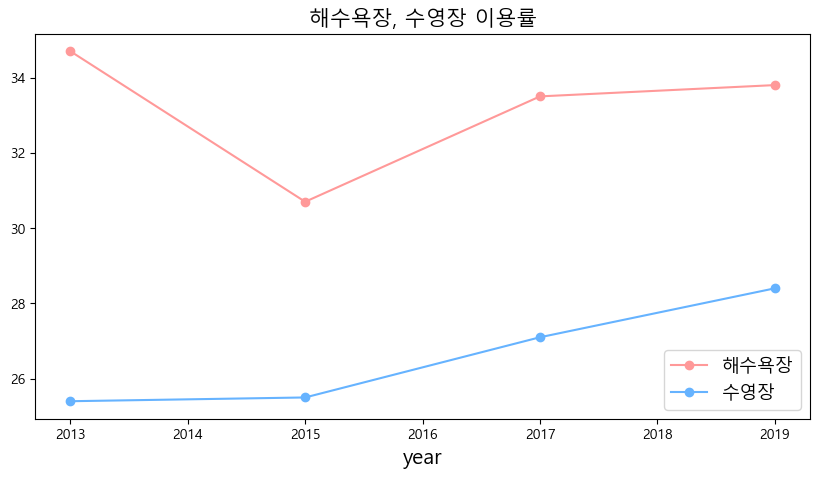

In [201]:
#꺽은선 그래프 그리기
data4.plot(kind='line', marker='o', figsize=(10,5), color=['#ff9999','#66b3ff'])

#그래프 제목 설정
plt.title('해수욕장, 수영장 이용률', fontsize=15)

#x축 이름 설정
plt.xlabel('year', fontsize=15)

#범례설정
plt.legend(['해수욕장', '수영장'], fontsize=13)

#x축 폰트 크기
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

